## Why is NumPy fast?
Because it uses contiguous arrays and algorithms written in C operating on those arrays without overhead


In [23]:
# from Python for Data Analysis (book)
import numpy as np

my_arr = np.arange(1000000)
my_list = list(range(1000000))

%time for _ in range(10): my_arr2 = my_arr * 2
    
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

# what if we try to do in-place mutation?
%time for i in range(1000000): my_list[i] = my_list[i] * 2

CPU times: user 14.5 ms, sys: 8.33 ms, total: 22.8 ms
Wall time: 22.8 ms
CPU times: user 570 ms, sys: 113 ms, total: 683 ms
Wall time: 683 ms
CPU times: user 128 ms, sys: 416 µs, total: 128 ms
Wall time: 128 ms


In [33]:
# try something really large
import numpy as np

# 1,000,000 elements
my_arr = np.arange(1000000)
%time  my_arr2 = my_arr * 2

# 1000,000,000 elements
my_arr = np.arange(1000000000)
%time  my_arr2 = my_arr * 2

CPU times: user 2.68 ms, sys: 501 ms, total: 504 ms
Wall time: 505 ms
CPU times: user 2.13 s, sys: 1.82 s, total: 3.96 s
Wall time: 4.01 s


In [50]:
# Now try less trivial multiplication because *2 can be very well optimized
my_arr = np.arange(1000000)

%time for _ in range(10): my_arr2 = my_arr * my_arr
print(my_arr2[10010])    
#=> still very fast!

CPU times: user 15.3 ms, sys: 5.98 ms, total: 21.3 ms
Wall time: 21.8 ms
100200100


## Creating arrays

In [12]:
# array accepts any sequential colleciton
# from Python for Data Analysis (book)
import numpy as np

my_list = [0, 1, 2, 3, 4]
my_arr = np.array(my_list)
print(my_arr)

# zeros, ones
print(np.zeros(10))
print(np.ones(10))

[0 1 2 3 4]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
# empty
# note: this will likely print garbage because values are not initialized
# https://stackoverflow.com/questions/54725478/are-the-values-returned-by-numpy-empty-random-or-not
print(np.empty((2, 3)))

[[ 3.10503618e+231 -1.49457642e-154  1.48219694e-323]
 [ 0.00000000e+000  0.00000000e+000  4.17201348e-309]]


In [13]:
# arrange is like range
my_arr = np.arange(5)
print(my_arr)



[0 1 2 3 4]
int64


## Array types

In [14]:
# dtype
print(my_arr.dtype)

int64


In [21]:
# convert strings to numbers
numeric_strings = np.array(['1.25', '-9.6', '42'])
print(numeric_strings.dtype)

print(numeric_strings.astype(float))

<U4
[ 1.25 -9.6  42.  ]


## Array operations

In [25]:
arr = np.array([[1, 2, 3], [4,5,6]])

print(arr * arr)

print(1 / arr)

[[ 1  4  9]
 [16 25 36]]
[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]


## Slices

In [27]:
arr = np.arange(10)

arr[5:8] = 12
# original array modified
print(arr)

[ 0  1  2  3  4 12 12 12  8  9]


In [33]:
# you can pass multiple slices
arr2d = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(arr2d)

# single slice
print(arr2d[:2])

# multiple slices
print(arr2d[:2, 1:])

# you can use ':' to mean "all"
print(arr2d[:, :2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]
[[2 3]
 [5 6]]
[[1 2]
 [4 5]
 [7 8]]


## Boolean Indexing

In [39]:
# notice duplcates
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7,4)
print(data)

# suppose each name corresponds to a data row and I want to select all rows matching 'Bob'
print(names == 'Bob')
# this "boolean array" can be passed when indexing
print(data[names == 'Bob'])
# equalivant to doing it manually:
print(data[[True, False, False, True, False, False, False]])

[[-0.32425014  0.56191069  0.12076539  1.28206945]
 [ 0.59663578 -1.38019047  1.7588912  -0.01129328]
 [ 0.59909299  0.58841457 -1.14823098  0.11249677]
 [ 1.68727833 -0.71386687  0.30283963  0.45599303]
 [-1.62280589  0.33310994  0.76869735 -0.44464619]
 [-0.28020223  0.74219786  0.88662946 -0.98202432]
 [-0.76006982 -1.03038359 -0.17506801  0.23763879]]
[ True False False  True False False False]
[[-0.32425014  0.56191069  0.12076539  1.28206945]
 [ 1.68727833 -0.71386687  0.30283963  0.45599303]]
[[-0.32425014  0.56191069  0.12076539  1.28206945]
 [ 1.68727833 -0.71386687  0.30283963  0.45599303]]


In [41]:
# I can also use boolean arithmetic
# this gives me 'Joe' rows
data[~(names == 'Bob') & ~(names == 'Will')]

array([[ 0.59663578, -1.38019047,  1.7588912 , -0.01129328],
       [-0.28020223,  0.74219786,  0.88662946, -0.98202432],
       [-0.76006982, -1.03038359, -0.17506801,  0.23763879]])

## Fancy indexing

Not that much different from Boolean indexing.
We just use integers instead of boolean True or False inside the array passed as "index"

In [47]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
    
print(arr)

# indexing using integers to get a particular rows in given order
print(arr[[4, 3, 0, 6]])

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]
[[4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]
 [6. 6. 6. 6.]]


## Transposing and Swapping Axes

Transposing makes no copies -> views.
Very frequent for matrix computations.

In [52]:
# reshape just turns 1D array into 2D array
ar = np.arange(15).reshape(3,5)
print(arr)

print(arr.T)

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]
[[0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]]


In [53]:
# transpose is useful for instance for matrix product
np.dot(arr.T, arr)

array([[140., 140., 140., 140.],
       [140., 140., 140., 140.],
       [140., 140., 140., 140.],
       [140., 140., 140., 140.]])

## Array functions

In [54]:
# "ufunc" functions can operate as fast vectorized wrappers

# from Python for Data Analysis (book)
import numpy as np

arr = np.arange(10)

# unary
print(np.sqrt(arr))
print(np.exp(arr))

# binary
arr1 = np.random.rand(10)
arr2 = np.random.rand(10)
print(arr1)
print(arr2)
print(np.maximum(arr1, arr2))

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]
[0.51451411 0.63171951 0.29147613 0.21327796 0.76957528 0.03907418
 0.14564481 0.00765069 0.74922234 0.49655205]
[0.4847496  0.27014652 0.31977199 0.99392781 0.74558582 0.76452399
 0.83673547 0.58110085 0.05409756 0.55434295]
[0.51451411 0.63171951 0.31977199 0.99392781 0.76957528 0.76452399
 0.83673547 0.58110085 0.74922234 0.55434295]


## 4.3 Array-Oriented Programming with Arrays

In [66]:
# meshgrid can combine two 1D arrays into a 2D array with all pairs (x,y) created from the input arrays
import numpy as np
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points

print("points:\n", points[:50])

xs, ys = np.meshgrid(points, points)

print("xs:\n", xs)
print("ys:\n", ys)

z = np.sqrt(xs ** 2 + ys ** 2)
print("z:\n", z)

points:
 [-5.   -4.99 -4.98 -4.97 -4.96 -4.95 -4.94 -4.93 -4.92 -4.91 -4.9  -4.89
 -4.88 -4.87 -4.86 -4.85 -4.84 -4.83 -4.82 -4.81 -4.8  -4.79 -4.78 -4.77
 -4.76 -4.75 -4.74 -4.73 -4.72 -4.71 -4.7  -4.69 -4.68 -4.67 -4.66 -4.65
 -4.64 -4.63 -4.62 -4.61 -4.6  -4.59 -4.58 -4.57 -4.56 -4.55 -4.54 -4.53
 -4.52 -4.51]
xs:
 [[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]
ys:
 [[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]
z:
 [[7.07106781 7.06400028 7.05693985 ... 7.04988652 7.05693985 7.06400028]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.0569256

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a gridof values')

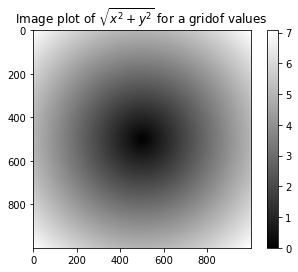

In [70]:
# now visualize it!
import matplotlib.pyplot as plt 
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a gridof values")

### Conditional logic as array operations - where, et. al

In [73]:
# where is similar to ternary operator but oeprates on arrays
import numpy as np
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = ([True, False, True, True, False])

# now we may take value from xarr whenever corresponding cond value is True, 
# and from yarr when it's False
print(np.where(cond, xarr, yarr))

[1.1 2.2 1.3 1.4 2.5]


In [76]:
# where also work with scalars!

# here we replace all positive values with 2, otherwise -2
arr = np.random.randn(4,4)
print("arr:\n", arr)
print("arr > 0:\n", arr > 0)

replaced = np.where(arr > 0, 2, -2)
print("replaced:\n", replaced)


arr:
 [[ 2.32529853e+00 -1.66979857e-01 -1.49659163e+00 -1.52738292e-01]
 [-4.19557538e-01  1.00116217e+00 -1.00996757e+00 -4.03922433e-01]
 [ 1.47612537e+00 -9.60593113e-01 -6.60915068e-01  6.57994699e-01]
 [-1.61910709e-01 -1.80547778e-03  1.18379015e+00  1.41539252e+00]]
arr > 0:
 [[ True False False False]
 [False  True False False]
 [ True False False  True]
 [False False  True  True]]
replaced:
 [[ 2 -2 -2 -2]
 [-2  2 -2 -2]
 [ 2 -2 -2  2]
 [-2 -2  2  2]]


### Mathematical and Statistical Methods

In [86]:
arr = np.random.rand(5,4)
print("arr:\n", arr)

print("mean: ", arr.mean())
print("sum: ", arr.sum())
print("std: ", arr.std())

# or use optional axis arg to compute statistic over the specific axis
# => result is an array with one fewer dimension
print("mean axis=0: ", arr.mean(axis=0)) # mean across the rows
print("mean axis=1: ", arr.mean(axis=1)) # mean across the columsn

arr:
 [[0.90488825 0.39707225 0.60352579 0.79985285]
 [0.9644304  0.65054605 0.04941895 0.71008322]
 [0.84902355 0.44857842 0.37395537 0.3863937 ]
 [0.04676244 0.3491553  0.7562931  0.46007026]
 [0.38642108 0.38282867 0.31957368 0.38662657]]
mean:  0.5112749957464817
sum:  10.225499914929635
std:  0.2528719109192659
mean axis=0:  [0.63030515 0.44563614 0.42055338 0.54860532]
mean axis=1:  [0.67633479 0.59361966 0.51448776 0.40307028 0.3688625 ]


In [93]:
# cumsum and cumprod don't aggregate; 
# they produce an array of intermediate results (cummulative sum/product)
arr = np.array([0,1,2,3,4,5,6,7])
print("arr:\n", arr)

print("cumsum:\n", arr.cumsum())

# optional axis arg
arr2 = np.array([[0,1,2], [3,4,5], [6,7,8]])
print("arr2:\n", arr2)
print("cumprod axis=1:\n", arr2.cumprod(axis=1))

arr:
 [0 1 2 3 4 5 6 7]
cumsum:
 [ 0  1  3  6 10 15 21 28]
arr2:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
cumprod axis=1:
 [[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


### Sorting

In [106]:
arr = np.random.randn(6)
print(arr)
arr.sort()
print(arr)

# sorting multidimensional array
arr = np.random.rand(5,3)
print(arr)
# notice we pass axis number to sort
arr.sort(1)
print("sorted 2D array:\n", arr)


[-0.33426265 -1.1811054   0.34980744 -2.22528514  0.5314163   1.09964354]
[-2.22528514 -1.1811054  -0.33426265  0.34980744  0.5314163   1.09964354]
[[0.96961791 0.11268705 0.83715525]
 [0.14101328 0.2795244  0.45123091]
 [0.62251845 0.81320384 0.83449767]
 [0.82998121 0.13321194 0.57441591]
 [0.58550405 0.2316222  0.00236969]]
sorted 2D array:
 [[0.11268705 0.83715525 0.96961791]
 [0.14101328 0.2795244  0.45123091]
 [0.62251845 0.81320384 0.83449767]
 [0.13321194 0.57441591 0.82998121]
 [0.00236969 0.2316222  0.58550405]]


In [115]:
# quick and dirty method to find quantiles of an array
large_arr = np.random.rand(1000)
large_arr.sort()
# compute 5% quantile:
idx05 = int(0.05 * len(large_arr))
print("index: ", idx05)
large_arr[idx05]

index:  50


0.03974555655511214

## 4.5 Linear Algebra

In [118]:
# * is an element-wise product instead of a matrix dot product
# => use dot function
x = np.array([[1.,2.,3.], [4.,5.,6.]])
y = np.array([[6.,23.], [-1,7], [8,9]])

x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [119]:
from numpy.linalg import inv,qr
X = np.random.rand(5,5)
print("X:\n", X)
mat = X.T.dot(X)
print("mat:\n", mat)
print("inv(mat):\n", inv(mat))


X:
 [[0.25362292 0.53598599 0.89486715 0.29089807 0.19420602]
 [0.99585649 0.7966372  0.13224231 0.33905851 0.07208244]
 [0.89877984 0.34073583 0.04949784 0.28943388 0.44914233]
 [0.06542526 0.27979856 0.48521041 0.22819981 0.71925143]
 [0.14475781 0.71609934 0.45062465 0.04299463 0.35317969]]
mat:
 [[1.88909523 1.35748801 0.5001173  0.69272321 0.62290166]
 [1.35748801 1.62909821 1.06030427 0.6192828  0.7687114 ]
 [0.5001173  1.06030427 1.25921701 0.44957872 0.71369227]
 [0.69272321 0.6192828  0.44957872 0.33727802 0.3902492 ]
 [0.62290166 0.7687114  0.71369227 0.3902492  0.8866992 ]]
inv(mat):
 [[ 18.86748281 -10.81741026  15.2926774  -41.86661513   2.24092624]
 [-10.81741026   8.65462008  -9.67224965  20.58076848  -1.17665705]
 [ 15.2926774   -9.67224965  14.47115628 -34.09810875   1.00162672]
 [-41.86661513  20.58076848 -34.09810875 104.88691178  -7.14826827]
 [  2.24092624  -1.17665705   1.00162672  -7.14826827   2.91348601]]


## 4.6 Pseudo-random Number Generation

In [121]:
# numpy's random generators sample the whole distribution 
# (not just a single value at a time like Python's buildin random module)
# It's also much faster!
np.random.normal(size=(4,4))

array([[-1.67918962,  0.82734286,  0.44033389, -1.01872576],
       [-0.10634732, -0.47210972, -1.04728617,  2.28031788],
       [ 1.06758074, -1.76561422, -0.00837898,  0.34952703],
       [ 0.83934057,  1.54474729, -0.83749393,  0.79683009]])

## Ch 4.7 - Example: Random Walks

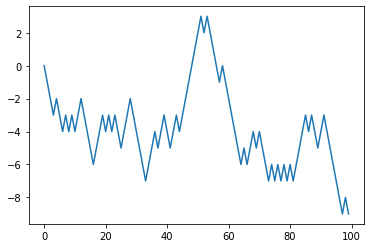

In [125]:
# simple random walk starting at 0 with steps of 1 and -1, equal probability
import random
position = 0
walk =[position]
steps = 1000
for i in range(steps):
    # random.randint(0,1) generates either 0 or 1
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

plt.plot(walk[:100])

min:  -19
max:  41
first crossing time:  275
element at first crossing time index:  -10


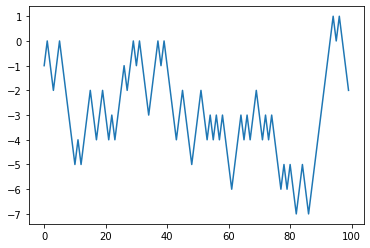

In [141]:
# the previous example is the same as computing "cumulative sum":
nsteps = 1000
draws = np.random.randint(0,2, size=nsteps)
steps = np.where(draws >0, 1, -1)
walk = steps.cumsum()

plt.plot(walk[:100])

# now we can extract statistics like min, max
print("min: ", walk.min())
print("max: ", walk.max())

# or even "first crossing time"
# - the step at which the random walk reaches given value
# notice using `argmax` which returns the first index of the
# maxium value in the boolean array (True is the max value)
first_crossing_time_10 = (np.abs(walk) >= 10).argmax()
print("first crossing time: ", first_crossing_time_10)
# this will be 10 or -10
print("element at first crossing time index: ", walk[first_crossing_time_10])